<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [3]:
#ANSWER:

bikes_csv=(r"C:\Users\preej\IOD\Workspace\Module 2 --- Week2\bikeshare.csv")
bikes=pd.read_csv(bikes_csv)
bikes


instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [5]:
#ANSWER:
bikes.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

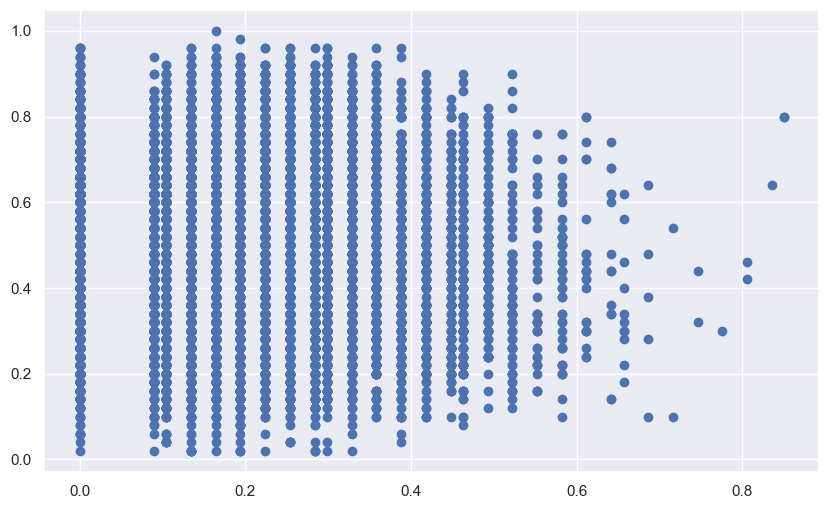

In [6]:
#ANSWER

plt.scatter(bikes.windspeed,bikes.temp)

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

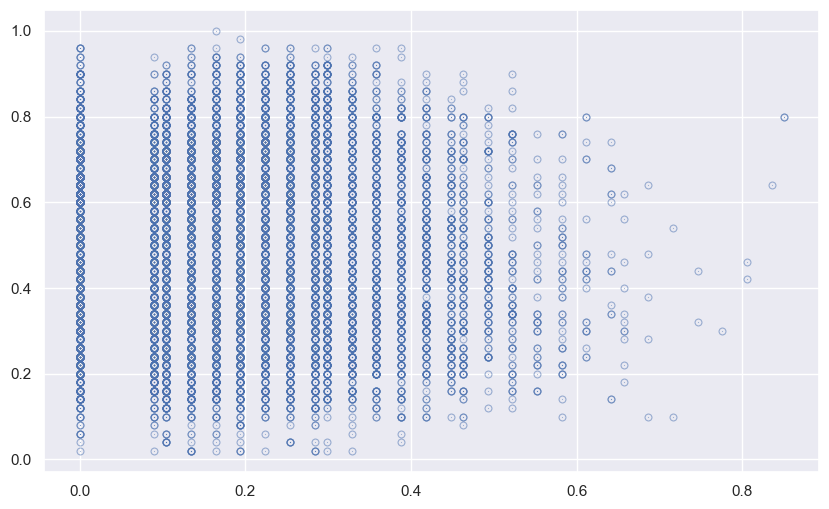

In [7]:
#ANSWER
plt.scatter(bikes.windspeed,bikes.temp,s=0.7, linewidths=5, alpha=0.5)

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

Text(0, 0.5, 'magnitude of `atemp`')

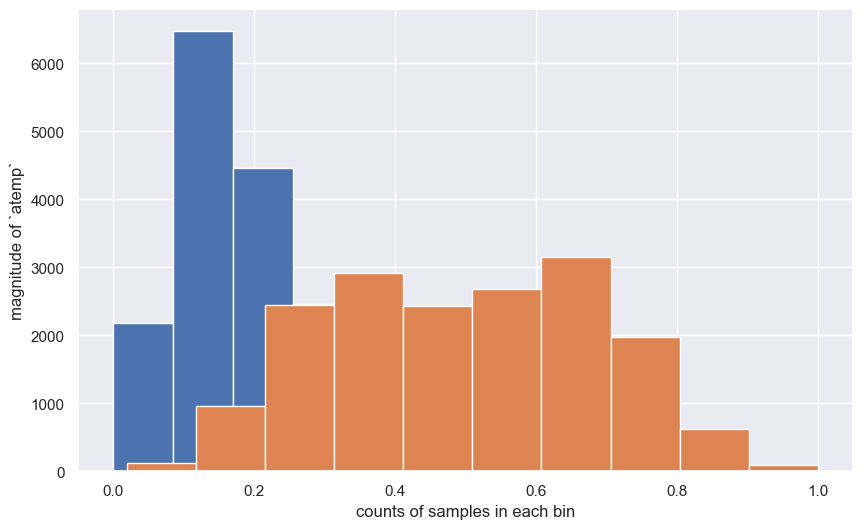

In [8]:
#ANSWER
plt.hist(bikes.windspeed,bins=None)
plt.hist(bikes.temp,bins=None)
plt.xlabel('counts of samples in each bin')
plt.ylabel('magnitude of `atemp`')

What do the horizontal and vertical axes represent?

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

{'whiskers': [<matplotlib.lines.Line2D at 0x229ab1fc040>,
 'caps': [<matplotlib.lines.Line2D at 0x229ab1fc580>,
 'boxes': [<matplotlib.lines.Line2D at 0x229ab1cfd60>],
 'medians': [<matplotlib.lines.Line2D at 0x229ab1fcac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229ab1fcd60>],
 'means': []}

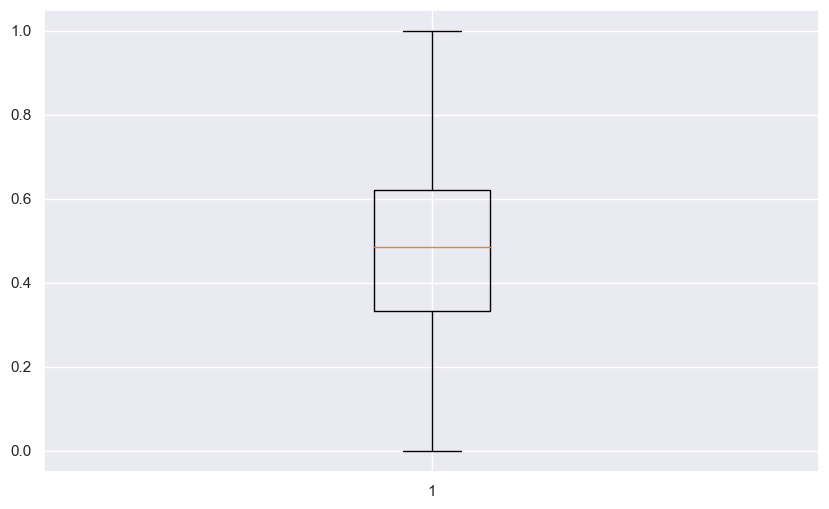

In [16]:
#ANSWER
boxplot(bikes.atemp)


This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

Text(0.5, 1.0, 'Box Plot of Atemp and Windspeed')

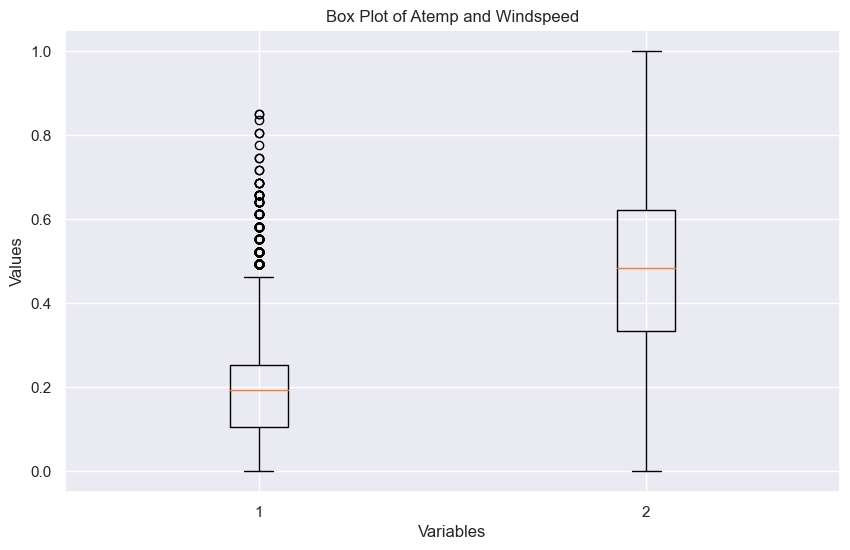

In [17]:
#ANSWE
boxplot(bikes[['windspeed','atemp']])
plt.xlabel('Variables')

plt.ylabel('Values')

plt.title('Box Plot of Atemp and Windspeed')


### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [15]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",", 
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [16]:
#ANSWER
df=pd.DataFrame(iris_data)
df.head(5)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [17]:
#ANSWER

distinct_species = df['species'].nunique()

# Find the number of samples for each species
samples_per_species = df['species'].value_counts()

print("Distinct number of species:", distinct_species)
print("Number of samples for each species:")
print(samples_per_species)

Distinct number of species: 3
Number of samples for each species:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [18]:
#ANSWER
Num_classes = df['species'].value_counts()
print(Num_classes)


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [19]:
#ANSWER 
from itertools import groupby
df.groupby(['sepal_length','sepal_width']).mean()


C:\Users\preej\AppData\Local\Temp\ipykernel_13492\1895431478.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sepal_length','sepal_width']).mean()


petal_length  petal_width
sepal_length sepal_width                           
4.3          3.0                   1.1          0.1
4.4          2.9                   1.4          0.2
             3.0                   1.3          0.2
             3.2                   1.3          0.2
4.5          2.3                   1.3          0.3
...                                ...          ...
7.7          2.6                   6.9          2.3
             2.8                   6.7          2.0
             3.0                   6.1          2.3
             3.8                   6.7          2.2
7.9          3.8                   6.4          2.0

[116 rows x 2 columns]

The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

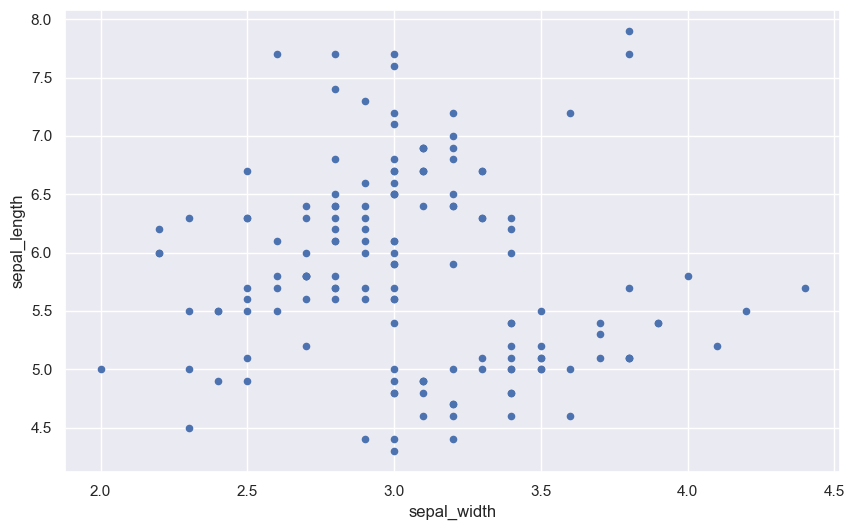

In [40]:
#ANSWER
df.plot.scatter('sepal_width','sepal_length')

**Draw a Barplot showing sepal width and length using the Pandas plot method.**

<Axes: xlabel='sepal_width'>

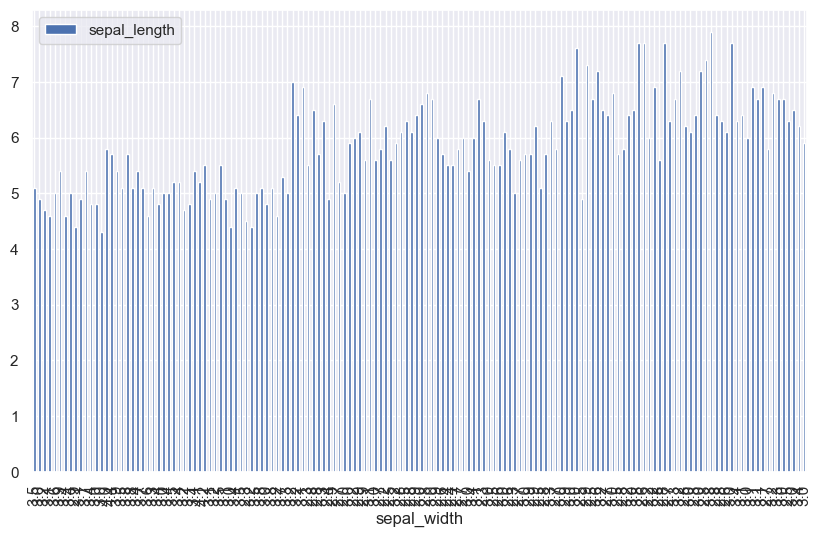

In [38]:
#ANSWER
df.plot.bar('sepal_width', 'sepal_length')


Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

<Axes: title={'center': 'Scatterplot between sepal width and length '}, xlabel='x', ylabel='y'>

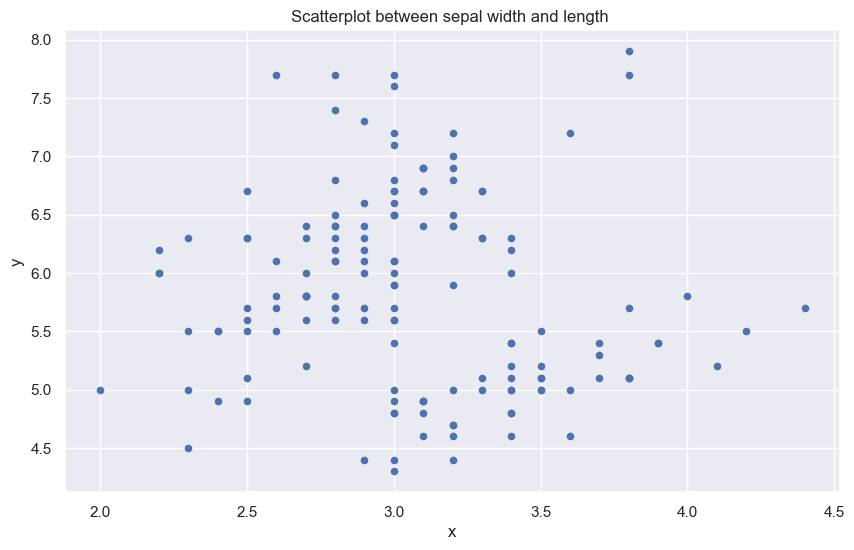

In [43]:
#ANSWER
df.plot.scatter('sepal_width','sepal_length', title="Scatterplot between sepal width and length ",xlabel="x",ylabel="y")

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

<Axes: title={'center': 'Scatterplot between petal width and length '}, xlabel='x', ylabel='y'>

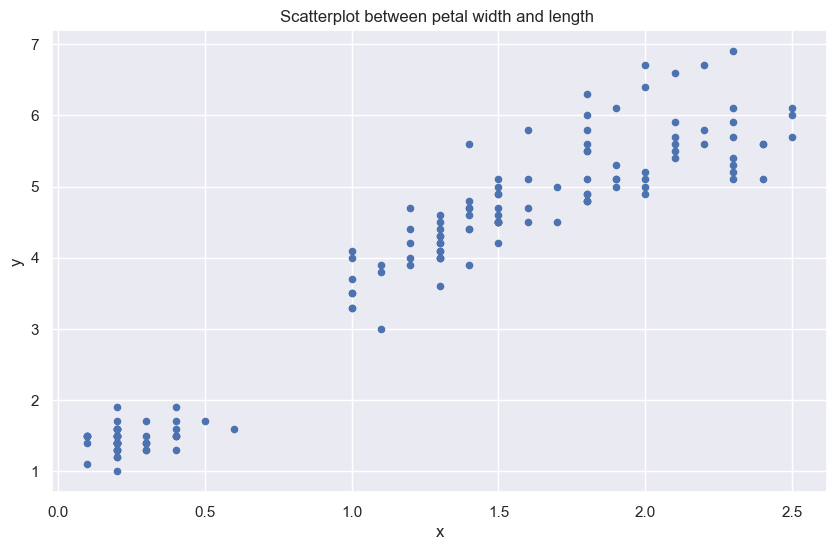

In [44]:
#ANSWER
df.plot.scatter('petal_width','petal_length', title="Scatterplot between petal width and length ",xlabel="x",ylabel="y")

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

Text(0.5, 1.0, 'Scatterplot with Hue')

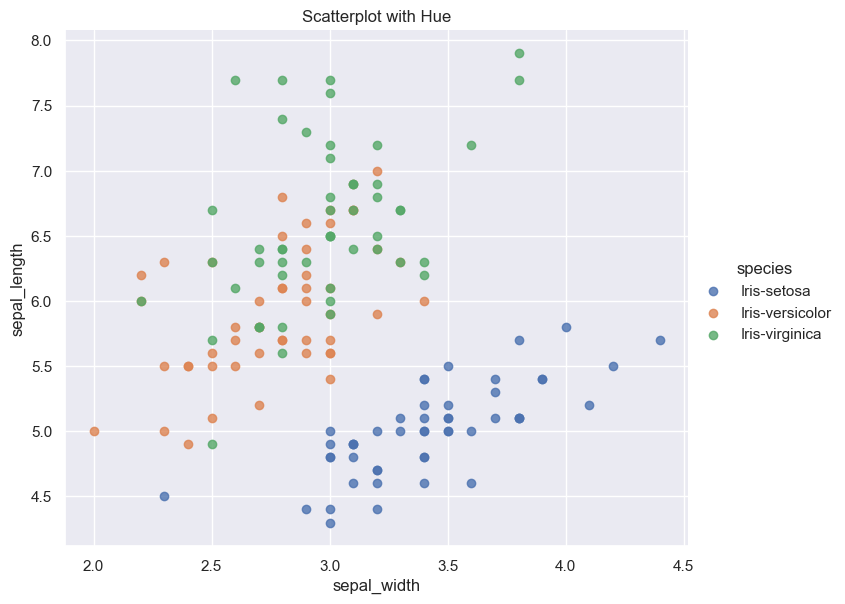

In [47]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris_data, hue='species', fit_reg=False, height=6, aspect=1.2)
plt.title('Scatterplot with Hue')

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

<Axes: title={'center': 'Scatterplot between petal width and length '}, xlabel='x', ylabel='y'>

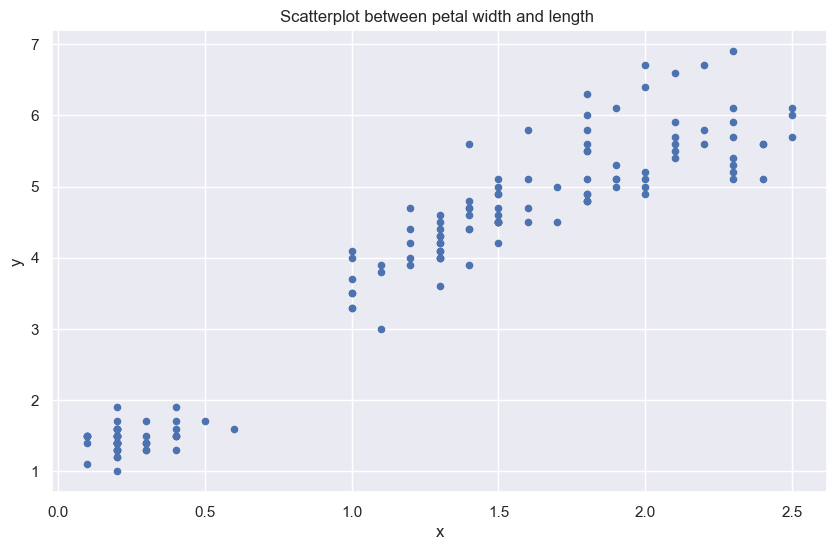

In [49]:
#ANSWER
df.plot.scatter('petal_width','petal_length', title="Scatterplot between petal width and length ",xlabel="x",ylabel="y")

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

Text(0.5, 1.0, 'Scatterplot with Hue')

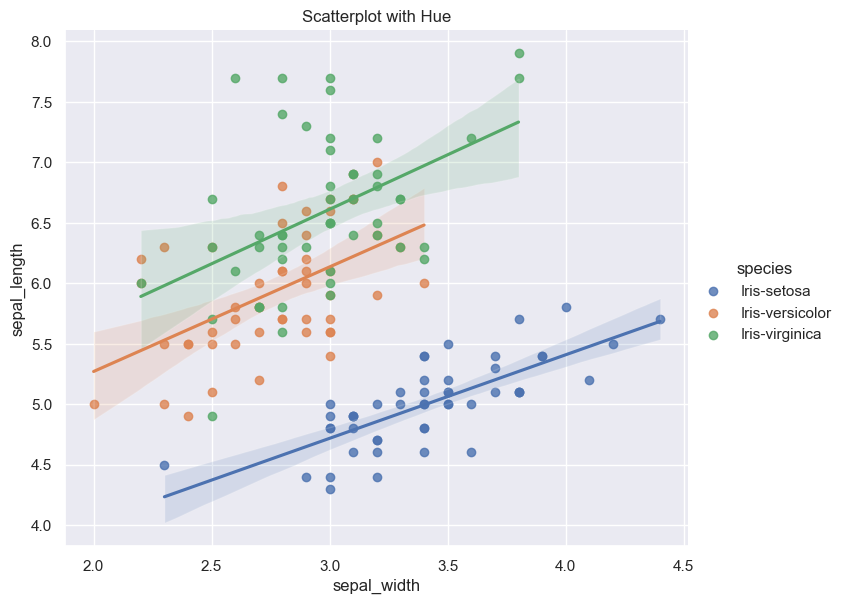

In [48]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris_data, hue='species', fit_reg=True, height=6, aspect=1.2)
plt.title('Scatterplot with Hue')

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

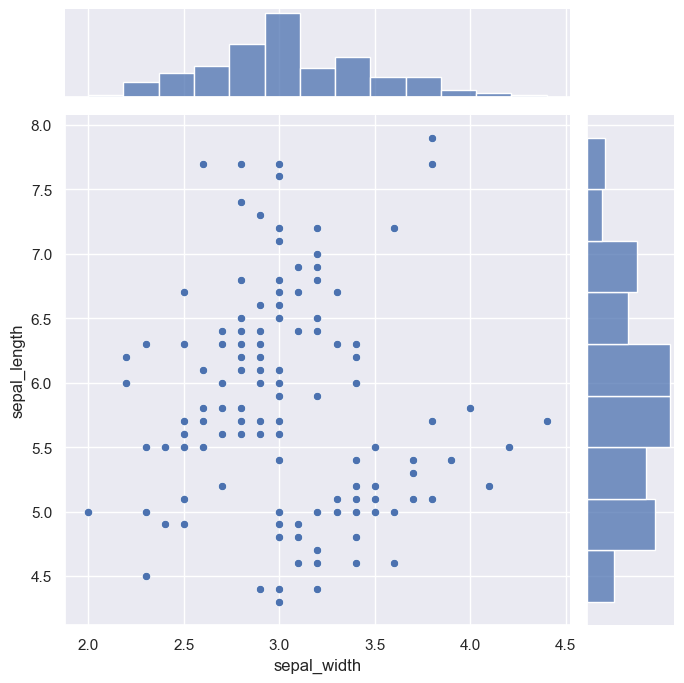

In [50]:
# ANSWER
sns.jointplot(x='sepal_width', y='sepal_length', data=iris_data, height=7, kind='scatter')

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

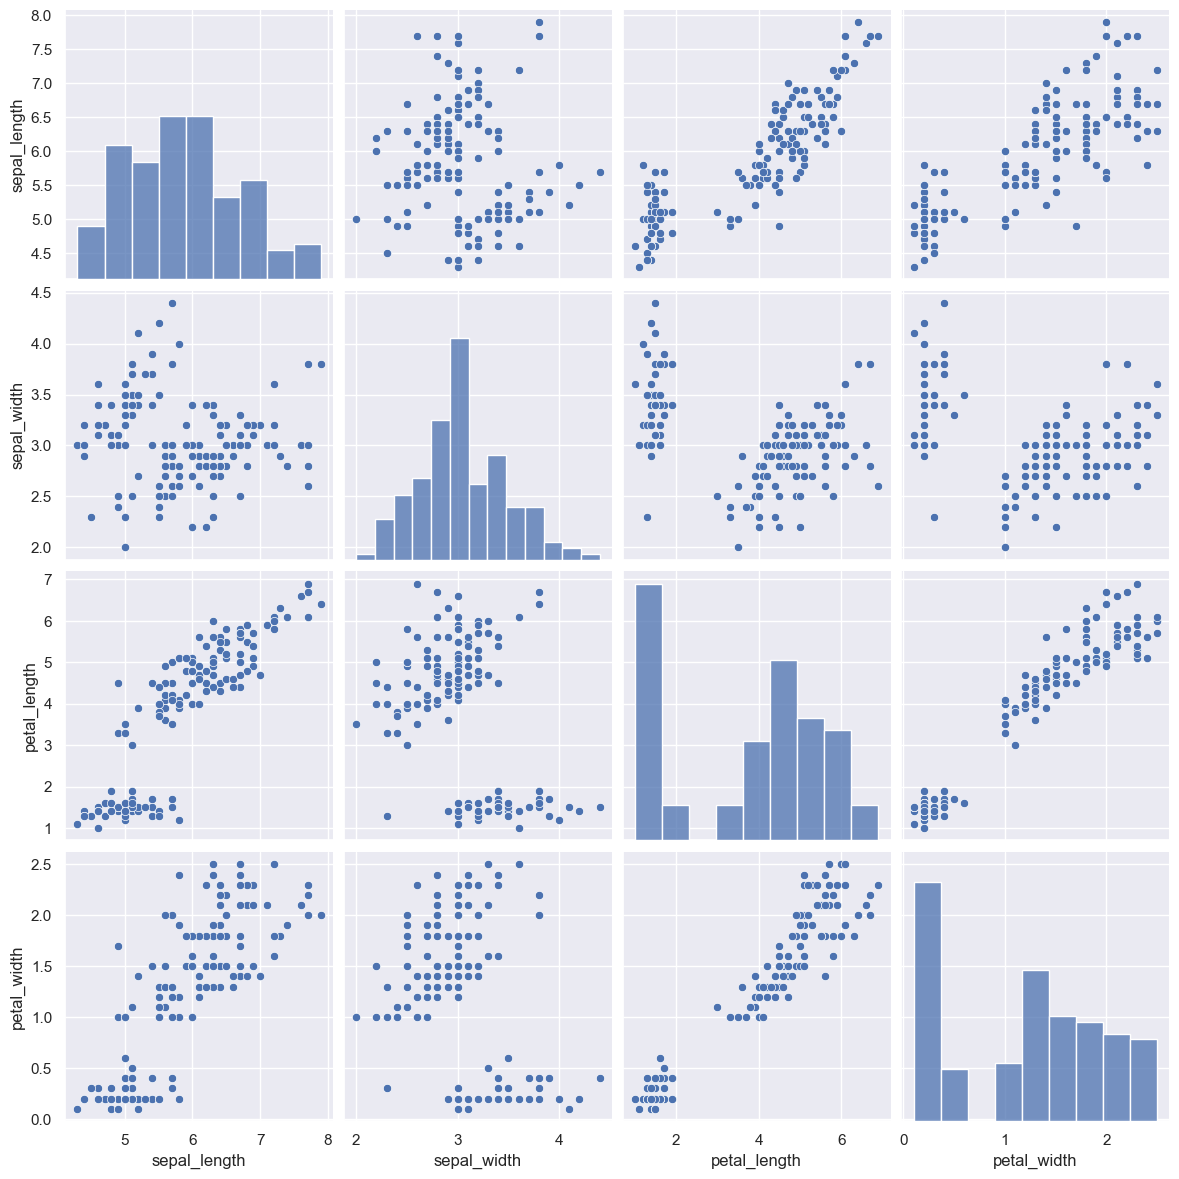

In [57]:
# ANSWER
sns.pairplot(df, height=3)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

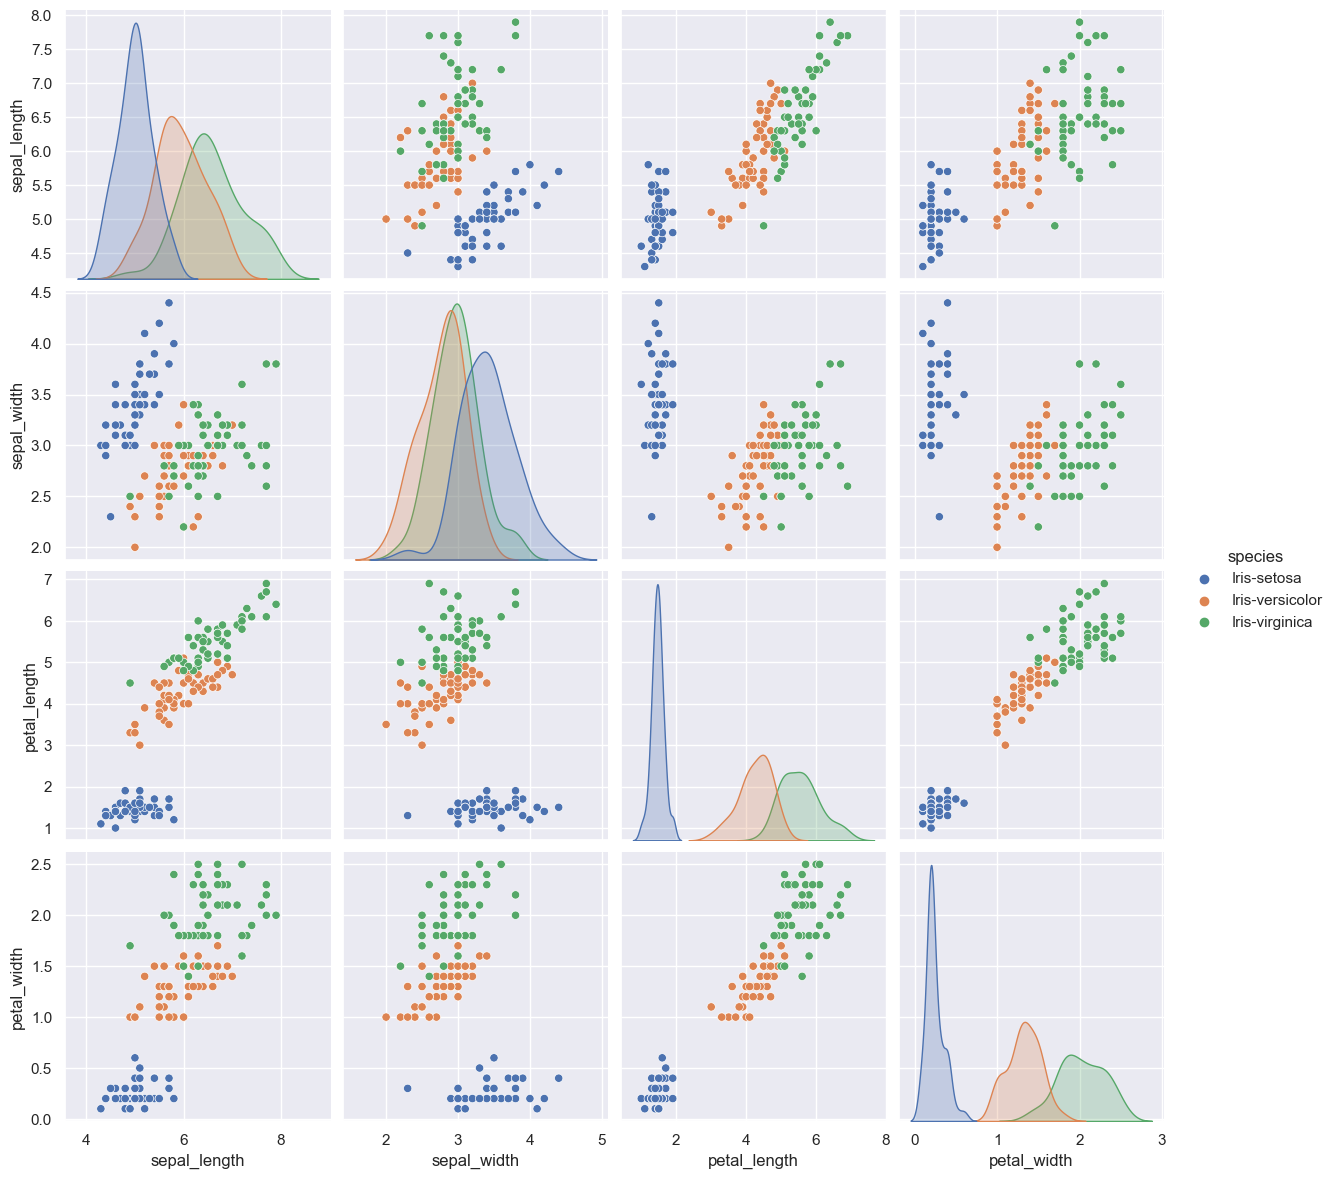

In [58]:
# ANSWER
sns.pairplot(df, hue='species', height=3)

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [ ]:
# ANSWER

In [59]:
iris_data.corr()

C:\Users\preej\AppData\Local\Temp\ipykernel_13492\514728938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install sweetviz

In [60]:
pip install sweetviz

     --------------------------------------- 15.1/15.1 MB 16.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
# ANSWER
import pandas as pd
import sweetviz as sv
df = pd.read_csv(r"C:\Users\preej\IOD\Workspace\Module 2 --- Week2\DATA\Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)

name   id nametype     recclass  mass (g)  fall  \
0               Aachen    1    Valid           L5      21.0  Fell   
1               Aarhus    2    Valid           H6     720.0  Fell   
2                 Abee    6    Valid          EH4  107000.0  Fell   
3             Acapulco   10    Valid  Acapulcoite    1914.0  Fell   
4              Achiras  370    Valid           L6     780.0  Fell   
5             Adhi Kot  379    Valid          EH4    4239.0  Fell   
6  Adzhi-Bogdo (stone)  390    Valid        LL3-6     910.0  Fell   
7                 Agen  392    Valid           H5   30000.0  Fell   
8               Aguada  398    Valid           L6    1620.0  Fell   
9        Aguila Blanca  417    Valid            L    1440.0  Fell   

                     year    reclat    reclong               GeoLocation  
0  01/01/1880 12:00:00 AM  50.77500    6.08333     (50.775000, 6.083330)  
1  01/01/1951 12:00:00 AM  56.18333   10.23333    (56.183330, 10.233330)  
2  01/01/1952 12:00:00 AM  54.21667 -113.00000  (54.216670, -113.000000)  
3  01/01/1976 12:00:00 AM  16.88333  -99.90000   (16.883330, -99.900000)  
4  01/01/1902 12:00:00 AM -33.16667  -64.95000  (-33.166670, -64.950000)  
5  01/01/1919 12:00:00 AM  32.10000   71.80000    (32.100000, 71.800000)  
6  01/01/1949 12:00:00 AM  44.83333   95.16667    (44.833330, 95.166670)  
7  01/01/1814 12:00:00 AM  44.21667    0.61667     (44.216670, 0.616670)  
8  01/01/1930 12:00:00 AM -31.60000  -65.23333  (-31.600000, -65.233330)  
9  01/01/1920 12:00:00 AM -30.86667  -64.55000  (-30.866670, -64.550000)

Use `analyze` of `sweetviz` to get the overview of the dataset.

In [63]:
# ANSWER
my_report = sv.analyze(df)
my_report.show_html() 

C:\Users\preej\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\preej\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\preej\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\preej\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\preej\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\preej\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"]

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [64]:
pip install pandas_profiling

     -------------------------------------- 324.4/324.4 kB 3.3 MB/s eta 0:00:00
     ------------------------------------- 356.3/356.3 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 152.1/152.1 kB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 102.7/102.7 kB ? eta 0:00:00
     ---------------------------------------- 296.5/296.5 kB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 15.0 MB/s eta 0:00:00
     ------------------------------------- 663.4/663.4 kB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 18.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=79b826754a503ec47ef745bd8ba4ea96053b7e9ccecedc4a7e24b63b787901a5
  Stored in directory: c:\users\preej\appdata\local\pip\cache\wheels\ea\1c\a8\5cec3479cd45136a7111e2d96aac299b219b199

In [ ]:
!pip uninstall pandas-profiling

In [ ]:
!pip install pandas-profiling[notebook,html]

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
profile = ProfileReport(df, title="Pandas Profiling Report", html={'style': {'full_width': True}})
profile

For **HOMEWORK**: check out the `pydqc` library.

In [ ]:
pip install pydqc

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [51]:
airpass = pd.read_csv(r'C:\Users\preej\IOD\Workspace\Module 2 --- Week2\DATA\AirPassengers.csv')
airpass.head()

TravelDate  Passengers
0   1/1/1949         112
1   2/1/1949         118
2   3/1/1949         132
3   4/1/1949         129
4   5/1/1949         121

In [52]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [53]:
# ANSWER
airpass['TravelDate'] = pd.to_datetime(airpass['TravelDate'])


Set `TravelDate` as index

In [54]:
# ANSWER

airpass.set_index('TravelDate',inplace=True)

In [47]:
airpass

Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [39]:
# ANSWER
airpass.head()

Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Here's how to see the values of the index:

In [40]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [41]:
ts = airpass['Passengers']
ts

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

We use the datetime index exactly like a row number index:

In [42]:
print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [43]:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [29]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

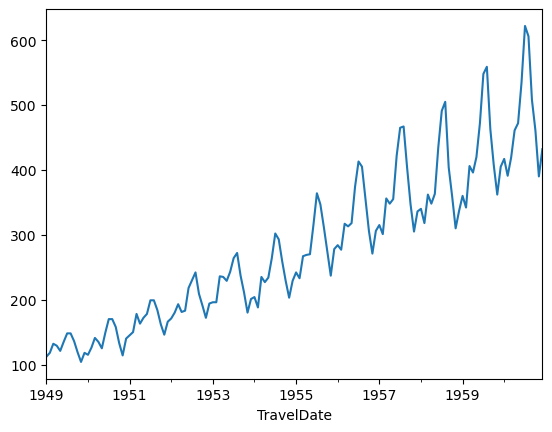

In [28]:
ts.plot();

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [9]:
!pip install folium

import folium

In [5]:
# Read SF Incidents data
crime_csv = pd.read_csv(r'C:\Users\preej\IOD\Workspace\DATA\SFPD_Incidents-Current_Year_2015.csv')
crime_csv

IncidntNum        Category                         Descript DayOfWeek  \
0        150827188    NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED    Sunday   
1        150827213         ASSAULT      INFLICT INJURY ON COHABITEE    Sunday   
2        150827213         ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE    Sunday   
3        150827213         ASSAULT           CHILD ABUSE (PHYSICAL)    Sunday   
4        150827213         ASSAULT              MAYHEM WITH A KNIFE    Sunday   
...            ...             ...                              ...       ...   
112326   150007653           FRAUD     CREDIT CARD, THEFT BY USE OF    Friday   
112327   150008457    NON-CRIMINAL                    LOST PROPERTY    Friday   
112328   150005538  OTHER OFFENSES                TRAFFIC VIOLATION    Friday   
112329   150005306    NON-CRIMINAL                    LOST PROPERTY    Friday   
112330   150042029    NON-CRIMINAL     DEATH REPORT, NATURAL CAUSES    Friday   

              Date   Time  PdDistrict      Resolution  \
0       09/20/2015  23:54    RICHMOND       UNFOUNDED   
1       09/20/2015  23:45   INGLESIDE  ARREST, BOOKED   
2       09/20/2015  23:45   INGLESIDE  ARREST, BOOKED   
3       09/20/2015  23:45   INGLESIDE  ARREST, BOOKED   
4       09/20/2015  23:45   INGLESIDE  ARREST, BOOKED   
...            ...    ...         ...             ...   
112326  01/02/2015  00:01  TENDERLOIN            NONE   
112327  01/02/2015  00:01        PARK            NONE   
112328  01/02/2015  00:01     MISSION  ARREST, BOOKED   
112329  01/02/2015  00:01     CENTRAL            NONE   
112330  01/02/2015  00:01    NORTHERN            NONE   

                         Address           X          Y  \
0       3000 Block of CLEMENT ST -122.491851  37.781756   
1          100 Block of LOEHR ST -122.413676  37.712617   
2          100 Block of LOEHR ST -122.413676  37.712617   
3          100 Block of LOEHR ST -122.413676  37.712617   
4          100 Block of LOEHR ST -122.413676  37.712617   
...                          ...         ...        ...   
112326      400 Block of EDDY ST -122.415067  37.783563   
112327     3600 Block of 16TH ST -122.434221  37.764224   
112328   900 Block of POTRERO AV -122.406870  37.757290   
112329   700 Block of VALLEJO ST -122.409792  37.798508   
112330  2700 Block of LOMBARD ST -122.446662  37.798595   

                                     Location  
0       (37.7817557255921, -122.491851328976)  
1       (37.7126165766239, -122.413676487435)  
2       (37.7126165766239, -122.413676487435)  
3       (37.7126165766239, -122.413676487435)  
4       (37.7126165766239, -122.413676487435)  
...                                       ...  
112326   (37.7835634796332, -122.41506687647)  
112327  (37.7642237070482, -122.434221184718)  
112328  (37.7572895904578, -122.406870402082)  
112329  (37.7985083480435, -122.409791662293)  
112330  (37.7985952787295, -122.446662025856)  

[112331 rows x 12 columns]

Convert `Date` Column to DateTime and set as index 

In [6]:
# ANSWER
crime_csv['Date']=pd.to_datetime(crime_csv['Date'])
crime_csv.set_index('Date')

IncidntNum        Category                         Descript  \
Date                                                                      
2015-09-20   150827188    NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED   
2015-09-20   150827213         ASSAULT      INFLICT INJURY ON COHABITEE   
2015-09-20   150827213         ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE   
2015-09-20   150827213         ASSAULT           CHILD ABUSE (PHYSICAL)   
2015-09-20   150827213         ASSAULT              MAYHEM WITH A KNIFE   
...                ...             ...                              ...   
2015-01-02   150007653           FRAUD     CREDIT CARD, THEFT BY USE OF   
2015-01-02   150008457    NON-CRIMINAL                    LOST PROPERTY   
2015-01-02   150005538  OTHER OFFENSES                TRAFFIC VIOLATION   
2015-01-02   150005306    NON-CRIMINAL                    LOST PROPERTY   
2015-01-02   150042029    NON-CRIMINAL     DEATH REPORT, NATURAL CAUSES   

           DayOfWeek   Time  PdDistrict      Resolution  \
Date                                                      
2015-09-20    Sunday  23:54    RICHMOND       UNFOUNDED   
2015-09-20    Sunday  23:45   INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45   INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45   INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45   INGLESIDE  ARREST, BOOKED   
...              ...    ...         ...             ...   
2015-01-02    Friday  00:01  TENDERLOIN            NONE   
2015-01-02    Friday  00:01        PARK            NONE   
2015-01-02    Friday  00:01     MISSION  ARREST, BOOKED   
2015-01-02    Friday  00:01     CENTRAL            NONE   
2015-01-02    Friday  00:01    NORTHERN            NONE   

                             Address           X          Y  \
Date                                                          
2015-09-20  3000 Block of CLEMENT ST -122.491851  37.781756   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
...                              ...         ...        ...   
2015-01-02      400 Block of EDDY ST -122.415067  37.783563   
2015-01-02     3600 Block of 16TH ST -122.434221  37.764224   
2015-01-02   900 Block of POTRERO AV -122.406870  37.757290   
2015-01-02   700 Block of VALLEJO ST -122.409792  37.798508   
2015-01-02  2700 Block of LOMBARD ST -122.446662  37.798595   

                                         Location  
Date                                               
2015-09-20  (37.7817557255921, -122.491851328976)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
...                                           ...  
2015-01-02   (37.7835634796332, -122.41506687647)  
2015-01-02  (37.7642237070482, -122.434221184718)  
2015-01-02  (37.7572895904578, -122.406870402082)  
2015-01-02  (37.7985083480435, -122.409791662293)  
2015-01-02  (37.7985952787295, -122.446662025856)  

[112331 rows x 11 columns]

Draw a timeseries plot to visualize number of crimes for each day.

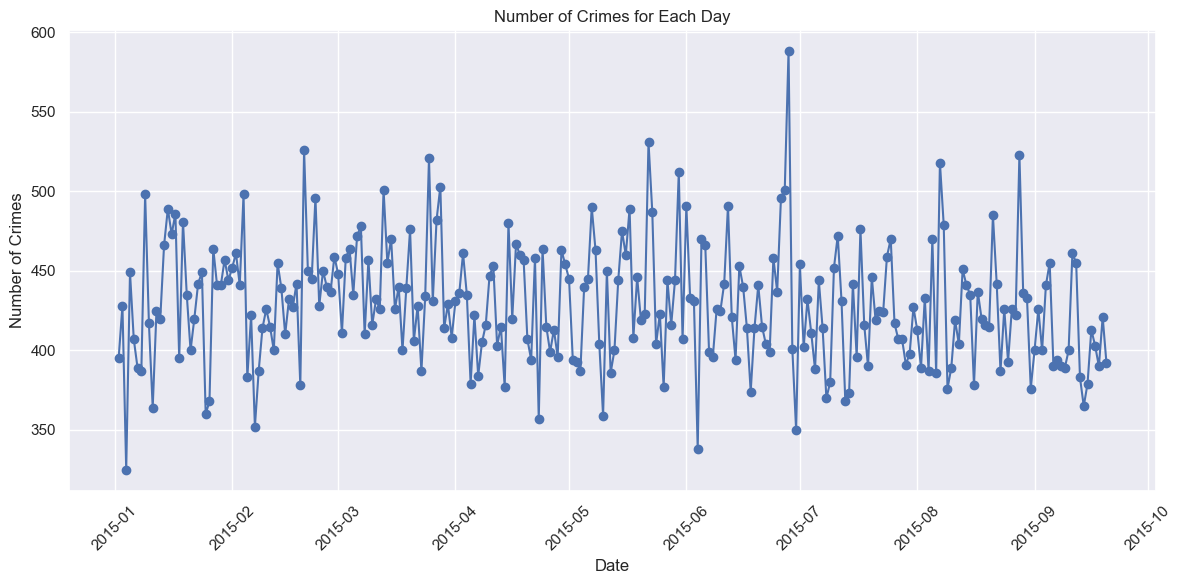

In [6]:
# ANSWER
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the incidents by date and counting the number of crimes for each day
crime_count_by_date = crime_csv.groupby('Date').size()

# Create a time series plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the number of crimes for each day
plt.plot(crime_count_by_date.index, crime_count_by_date.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Number of Crimes for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [ ]:
pip install --upgrade folium ipython

In [8]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [7]:

import folium
import pandas as pd


# Define the function to generate a base map
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location=default_location,
        control_scale=True,
        zoom_start=default_zoom_start
    )
    
    return base_map

# Create a base map using the function
sf_map = generateBaseMap()

# Iterate through the first 100 rows and add circles to the map
for index, row in crime_csv.head(100).iterrows():
    folium.Circle(
        location=[row['Y'], row['X']],
        radius=50,  # Adjust the radius of the circle as needed
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"Incident Type: {row['Category']}\nLocation: {row['Address']}"
    ).add_to(sf_map)

# Display the map
sf_map



In [8]:
import folium
import pandas as pd


# Create a base map centered around San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Iterate through the first 100 rows and add circles to the map
for index, row in crime_csv.head(100).iterrows():
    folium.Circle(
        location=[row['Y'], row['X']],
        radius=50,  # Adjust the radius of the circle as needed
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"Incident Type: {row['Category']}\nLocation: {row['Address']}"
    ).add_to(sf_map)

# Display the map
sf_map


Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [19]:
# ANSWER
import folium
import pandas as pd


# Create a base map centered around San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Iterate through the first 100 rows and add markers to the map
for index, row in crime_csv.head(100).iterrows():
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=f"Incident Type: {row['Category']}\nLocation: {row['Address']}"
    ).add_to(sf_map)

# Display the map
sf_map



Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [9]:
# ANSWER
import folium
import pandas as pd


# Create a base map centered around San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Group the data by date and location
grouped_data = crime_csv.groupby(['Date', 'X', 'Y']).size().reset_index(name='Count')

# Iterate through the first 100 rows and add circles to the map
for index, row in grouped_data.head(100).iterrows():
    folium.Circle(
        location=[row['Y'], row['X']],
        radius=row['Count'] * 10,  # You can adjust the radius based on your preference
        color='blue',  # Color of the circle's border
        fill=True,
        fill_color='blue',  # Fill color of the circle
        fill_opacity=0.5,
        popup=f"Date: {row['Date']}\nNumber of Crimes: {row['Count']}"
    ).add_to(sf_map)

# Display the map
sf_map


[BONUS] Create a heatmap of the incident happened in SF.

In [21]:
import folium
from folium.plugins import HeatMap
import pandas as pd


# Create a base map centered around San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Extract latitude and longitude coordinates from the dataset
locations = crime_csv[['Y', 'X']].values

# Create a heatmap using the HeatMap plugin
heat_map = HeatMap(locations, radius=15)

# Add the heatmap layer to the map
heat_map.add_to(sf_map)

# Display the map
sf_map


**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

In [ ]:
# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



